# Similarity Metrics in KNN

---

## 1️ Euclidean Distance (Most Common)
- In KNN similarity metrics are formulas used to measure how close or similar two data points are
- KNN decides the nearest neighbours
- Different metrics work better for different types of data.

**Definition:** The straight-line distance between two points.

### **Formula**
\[
d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + \cdots}
\]

### **When to Use?**
- Continuous numerical data  
- Geometry-based problems  
- Image data, coordinates, physical distances  

---

## 2️ Manhattan Distance

**Definition:** Distance measured along axes (like city blocks).

### **Formula**
\[
d = |x_1 - x_2| + |y_1 - y_2| + \cdots
\]

### **When to Use?**
- High-dimensional data  
- When features are independent  
- Movement in grid-like paths (e.g., chessboard)

---

## 3️ Minkowski Distance

**Definition:** A generalized form of Euclidean and Manhattan distance.

### **Formula**
\[
d = \left( \sum |x_i - y_i|^p \right)^{1/p}
\]

- If **p = 1 → Manhattan Distance**  
- If **p = 2 → Euclidean Distance**

### **When to Use?**
- When tuning KNN with different distance norms

---

## 4️ Cosine Similarity (Angle-Based Similarity)

**Definition:** Measures the angle between two vectors.

### **Formula**
\[
\text{Cosine Similarity} = \frac{A \cdot B}{\|A\| \|B\|}
\]

> In KNN, often converted to **Cosine Distance = 1 – Cosine Similarity**

### **When to Use?**
- Text data  
- NLP  
- High-dimensional sparse data (TF-IDF vectors)

---

## 5️ Hamming Distance (For Categorical Data)

**Definition:** Counts number of mismatched positions.

### **Example**
`["Male","Yes","Red"]`  
vs  
`["Female","Yes","Blue"]`  
→ **Difference = 2**

### **When to Use?**
- Strings  
- Binary features  
- Categorical features (after encoding)

---
                     
                               

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- Euclidean distance 

In [2]:
doc= ['dogs like running', 'cats like napping']
doc

['dogs like running', 'cats like napping']

In [3]:
# conver those doc into vectors
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
cvect=CountVectorizer()
cvect

CountVectorizer()

In [5]:
vec=cvect.fit_transform(doc)

In [6]:
vec.toarray()

array([[0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0]], dtype=int64)

In [7]:
df = pd.DataFrame(vec.toarray(), columns=cvect.get_feature_names_out())

In [8]:
df

,cats,dogs,like,napping,running
0,0,1,1,0,1
1,1,0,1,1,0


In [9]:
# Euclidean distance
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances

In [10]:
arr = np.identity(3)

In [11]:
pairwise_distances(arr)

array([[0.        , 1.41421356, 1.41421356],
       [1.41421356, 0.        , 1.41421356],
       [1.41421356, 1.41421356, 0.        ]])

In [12]:
euclidean_distances(arr)

array([[0.        , 1.41421356, 1.41421356],
       [1.41421356, 0.        , 1.41421356],
       [1.41421356, 1.41421356, 0.        ]])

In [13]:
x = arr[0 ,:]
x

array([1., 0., 0.])

In [14]:
y = arr[1:,:]
y

array([[0., 1., 0.],
       [0., 0., 1.]])

In [15]:
pairwise_distances(x.reshape(1,-1),y)

array([[1.41421356, 1.41421356]])

In [16]:
vec.toarray()

array([[0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0]], dtype=int64)

In [17]:
pairwise_distances(vec.toarray())

array([[0., 2.],
       [2., 0.]])

In [18]:
euclidean_distances(vec.toarray())

array([[0., 2.],
       [2., 0.]])

In [19]:
# Manhattan distance
from sklearn.metrics.pairwise import manhattan_distances

In [20]:
manhattan_distances(vec.toarray())

array([[0., 4.],
       [4., 0.]])

In [21]:
pairwise_distances(vec.toarray(), metric='manhattan')

array([[0., 4.],
       [4., 0.]])

In [22]:
# Minkowski distance
pairwise_distances(vec.toarray(),metric='minkowski',p = 1) # p=1--> Manhattan,p=2--> Euclidean

array([[0., 4.],
       [4., 0.]])

In [23]:
pairwise_distances(vec.toarray(),metric='minkowski',p = 2) # p=1--> Manhattan,p=2--> Euclidean

array([[0., 2.],
       [2., 0.]])

In [24]:
pairwise_distances(vec.toarray(),metric='minkowski',p = 3) # p=1--> Manhattan,p=2--> Euclidean

array([[0.        , 1.58740105],
       [1.58740105, 0.        ]])

In [25]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
cosine_similarity(vec.toarray())

array([[1.        , 0.33333333],
       [0.33333333, 1.        ]])

In [27]:
# cosine distance
from sklearn.metrics.pairwise import cosine_distances

In [28]:
cosine_distances(vec.toarray())

array([[0.        , 0.66666667],
       [0.66666667, 0.        ]])

In [29]:
# Angular distance -calcualtes using cosine similarity
np.arccos(cosine_similarity(vec.toarray()))

C:\Users\HP\AppData\Local\Temp\ipykernel_2356\2001619918.py:2: RuntimeWarning: invalid value encountered in arccos
  np.arccos(cosine_similarity(vec.toarray()))


array([[       nan, 1.23095942],
       [1.23095942,        nan]])

In [30]:
np.degrees(np.arccos(cosine_similarity(vec.toarray())))

C:\Users\HP\AppData\Local\Temp\ipykernel_2356\1130519840.py:1: RuntimeWarning: invalid value encountered in arccos
  np.degrees(np.arccos(cosine_similarity(vec.toarray())))


array([[        nan, 70.52877937],
       [70.52877937,         nan]])

In [31]:
# Hamming distance
pairwise_distances(vec.toarray(), metric='hamming')

array([[0. , 0.8],
       [0.8, 0. ]])

In [32]:
# Jaccard score
from sklearn.metrics import jaccard_score

In [33]:
jaccard_score(vec.toarray()[0],vec.toarray()[1])

0.2

In [34]:
# Levenshtein distance
!pip install Levenshtein

In [35]:
import Levenshtein

In [36]:
Levenshtein.distance('computer', 'computing')

3

In [37]:
# MNIST
df = pd.read_csv(r"C:\Users\HP\Downloads\mnist_train_small.csv",header=None)

In [38]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.shape

(20000, 785)

In [61]:
sample = df.sample(n = 1)
sample

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
9543,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
sample.values # returns the ndarray 

array([[  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   4,  25, 131, 131, 131, 131,  98,  44, 131, 192,
        131, 131,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 148, 250, 254, 254, 254, 254, 254, 254,
        244, 252, 254, 254, 206,  77,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  90

In [63]:
sample.shape

(1, 785)

In [64]:
sample.values[: , 1:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   4,  25, 131, 131, 131, 131,  98,  44, 131, 192, 131,
        131,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 148, 250, 254, 254, 254, 254, 254, 254, 244,
        252, 254, 254, 206,  77,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  90, 236

In [65]:
sample.values[: , 1:].shape

(1, 784)

In [66]:
arr2d = sample.values[: , 1:].reshape(28,28)

In [67]:
arr2d

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,  25, 131, 131, 131, 131,
         98,  44, 131, 192, 131, 131,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 148, 250, 254, 254, 254, 254,
        254, 254, 244, 252, 254, 254, 206,  77,   0,   0,   0,   0,   0,
          0,   0],
       [  

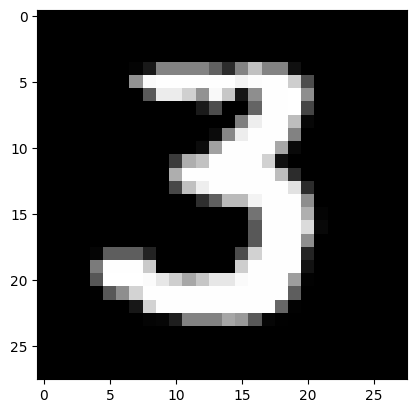

In [68]:
plt.imshow(arr2d,cmap='grey')

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
arr2d.flatten().reshape(1,-1).shape

(1, 784)

In [71]:
df.values.shape

(20000, 785)

In [72]:
df.iloc[:,1:].values.shape

(20000, 784)

In [73]:
similarities = cosine_similarity(arr2d.flatten().reshape(1,-1),df.iloc[:,1:].values)
similarities

array([[0.38738996, 0.57228178, 0.40390748, ..., 0.42480643, 0.36416298,
        0.46943836]])

In [74]:
sort_sim = np.argsort(similarities) #returns in ascending order
sort_sim

array([[19390,  8755, 14497, ..., 12917, 10211,  9543]], dtype=int64)

In [75]:
sort_sim[:,-9:] #last 9 are high similar

array([[ 9066,  6828,   371, 19440,  6951, 17938, 12917, 10211,  9543]],
      dtype=int64)

In [76]:
top9_sim = sort_sim[:,-9:].flatten()
top9_sim

array([ 9066,  6828,   371, 19440,  6951, 17938, 12917, 10211,  9543],
      dtype=int64)

In [77]:
df1 = df.iloc[top9_sim,1:] 
df1

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
9066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


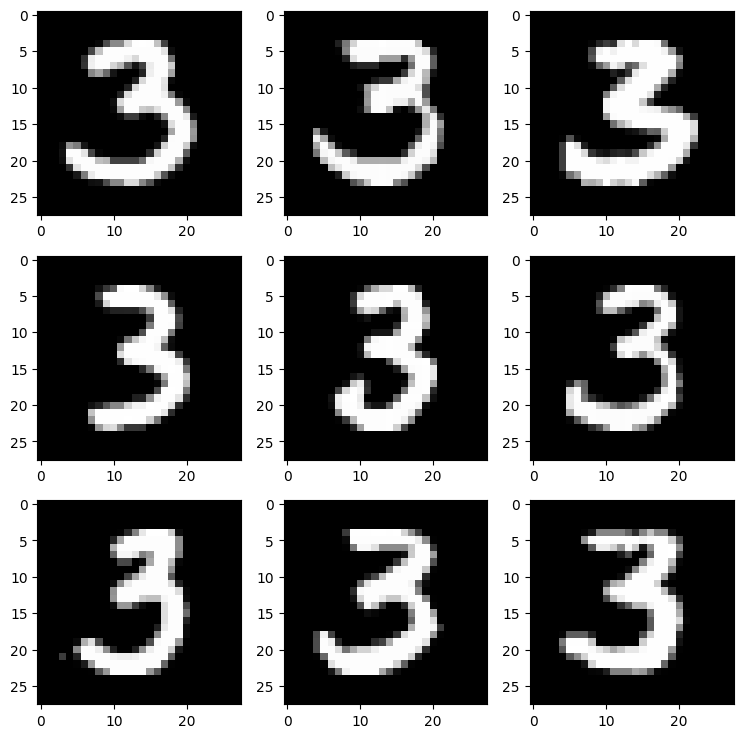

In [79]:
fig, ax = plt.subplots(3,3,figsize=(9,9))
axs = ax.flatten()
for i in range(df1.shape[0]):
    axs[i].imshow(df1.iloc[i].values.reshape(28,28),cmap='grey')